# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.


**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
import sys
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# set up notebook environment
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf',
                   env={'app_root': app_root_dir})

## Create the model facade

Create the facade with a factory, which in turn creates the executor.  The statistics on the data set that is configured on the executor is, by default, printed to standard out.  You can set the `writer` property to `None` on the facade to disable this.

In [2]:
from zensols.deeplearn.model import ModelFacade
facade = ModelFacade(config)
# configure the logging system using the facade configuration making WARNING the default (root) level
facade.configure_jupyter()

2020-09-03 18:28:34,375[INFO]zensols.deeplearn.model.facade: creating new executor


## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

Note that in this step, all batches are loaded and logged.  This example shows that with `cache_executor` and `cache_batches` set to `True`, batches are not reloaded.  This saves time in terms of allocating, decoding and then deallocating CPU/GPU memory, especially when tuning hyperparameters and re-running for large datasets.

In [3]:
facade.train()
default_res = facade.test('Default (adam)')
facade.write_result()

2020-09-03 18:28:34,685[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-09-03 18:28:34,686[INFO]zensols.deeplearn.model.facade: training...
2020-09-03 18:28:42,369[INFO]zensols.multi.stash: mnist_batch_dataframe_stash: spawning work with chunk size 438 across 8 workers
2020-09-03 18:28:42,455[INFO]zensols.multi.stash: factory inst mnist_batch_dataframe_stash for chunk 0 in 0s
2020-09-03 18:28:42,457[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-09-03 18:28:42,457[INFO]zensols.multi.stash: factory inst mnist_batch_dataframe_stash for chunk 1 in 0s
2020-09-03 18:28:42,460[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2020-09-03 18:28:42,461[INFO]zensols.multi.stash: factory inst mnist_batch_dataframe_stash for chunk 2 in 0s
2020-09-03 18:28:42,466[INFO]zensols.multi.stash: processing chunk 2 with stash <class 'zensols.deeplearn.batch.stash.B

Name: 2: Default (adam)
Run index: 2
Learning rate: 0.01
    train:
        started: 09/03/2020 18:28:50:824554
        ended: 09/03/2020 18:31:44:018322
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 37/40
        ave/min loss: 6.25117/0.00003
        accuracy: 0.925 (44402/48000)
        micro: F1: 0.925, precision: 0.925, recall: 0.925
        macro: F1: 0.925, precision: 0.928, recall: 0.924
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 6/40
        ave/min loss: 4.51396/0.00659
        accuracy: 0.941 (11288/12000)
        micro: F1: 0.941, precision: 0.941, recall: 0.941
        macro: F1: 0.941, precision: 0.944, recall: 0.939
    test:
        started: 09/03/2020 18:31:54:456918
        ended: 09/03/2020 18:31:54:689583
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 5.09923/0.00010
        accuracy: 0.942 (9417/10000

## Switch to stochastic gradient descent from the default (adam).

For this task, the (older) stochastic gradient descent algorithm works better.

In [4]:
# update the parameters
facade.executor.model_settings.optimizer_class_name = 'torch.optim.SGD'
# used in titles for plots later
desc = 'Switched to SGD'
# train again using the new optimizer
facade.train(desc)

2020-09-03 18:31:54,930[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-09-03 18:31:54,931[INFO]zensols.deeplearn.model.facade: training...
2020-09-03 18:31:54,932[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-09-03 18:31:54,933[INFO]zensols.deeplearn.model.executor.status: train/test sets: 2400 600
2020-09-03 18:31:54,937[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-09-03 18:31:54,939[INFO]zensols.deeplearn.model.executor.status: training model <class 'mnist.model.MnistNetwork'> on cuda:0 for 40 epochs using learning rate 0.01
  0%|                                                                                            | 0/40 [00:00<?, ?it/s]2020-09-03 18:31:54,941[INFO]zensols.deeplearn.model.executor.status: watching update file None
tr:0.388|va min:1.180|va:1.167 \/: 100%|█████████████████████████████████████████████

mnist.model.MnistNetwork (2)

In [5]:
# rerun the test after the second training
with_sgd_res = facade.test(desc)
facade.write_result()

2020-09-03 18:35:29,399[INFO]zensols.deeplearn.model.executor.status: reloading model weights
2020-09-03 18:35:29,404[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
tr:0.388|va min:1.180|va:1.167 \/: 100%|████████████████████████████████████████████████| 40/40 [03:34<00:00,  5.36s/it]
2020-09-03 18:35:33,009[INFO]zensols.deeplearn.model.facade: testing...
2020-09-03 18:35:33,010[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-09-03 18:35:33,010[INFO]zensols.deeplearn.model.executor.status: train/test sets: 500
2020-09-03 18:35:33,012[INFO]zensols.deeplearn.model.executor.status: testing model <class 'mnist.model.MnistNetwork'> on cuda:0
2020-09-03 18:35:33,245[INFO]zensols.deeplearn.model.executor.status: executed test in 0s
2020-09-03 18:35:33,246[INFO]zensols.deeplearn.model.executor.status: deallocating 0 batches
2020-09-03 18:35:33,246[INFO]zensols.d

Name: 2: Switched to SGD
Run index: 2
Learning rate: 0.01
    train:
        started: 09/03/2020 18:31:54:941679
        ended: 09/03/2020 18:35:19:963153
        batches: 2400
        ave data points per batch: 20.0
        converged/epochs: 40/40
        ave/min loss: 0.38791/0.00249
        accuracy: 0.995 (47754/48000)
        micro: F1: 0.995, precision: 0.995, recall: 0.995
        macro: F1: 0.995, precision: 0.995, recall: 0.995
    validation:
        batches: 600
        ave data points per batch: 20.0
        converged/epochs: 40/40
        ave/min loss: 1.16738/0.00176
        accuracy: 0.982 (11780/12000)
        micro: F1: 0.982, precision: 0.982, recall: 0.982
        macro: F1: 0.981, precision: 0.981, recall: 0.981
    test:
        started: 09/03/2020 18:35:33:013252
        ended: 09/03/2020 18:35:33:245605
        batches: 500
        ave data points per batch: 20.0
        converged/epochs: 1/1
        ave/min loss: 1.15143/0.00016
        accuracy: 0.981 (9805/100

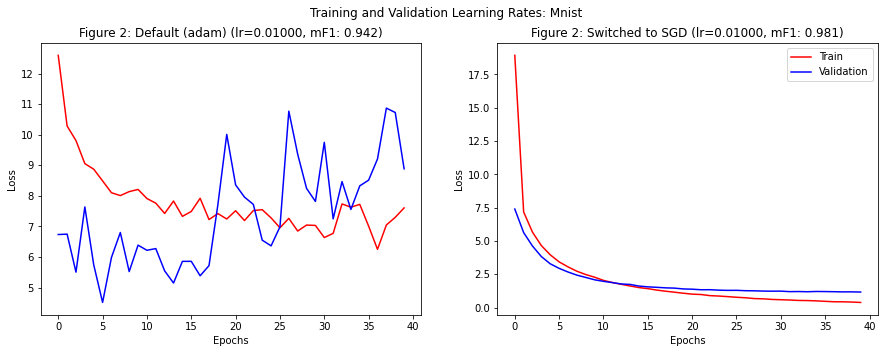

In [6]:
# plot the results
facade.result_manager.get_grapher().plot([default_res, with_sgd_res])